# Generator

The goal here is to create a generator with correlated cadres. 




In [ ]:
import pandas as pd

In [ ]:
!rm -rf *

In [ ]:
#This just gets the data and preps the environment. 
data="https://github.com/jkuruzovich/final-starter-2019/raw/master/data.zip"
!wget $data && unzip -o data.zip

--2019-05-09 00:06:01--  https://github.com/jkuruzovich/final-starter-2019/raw/master/data.zip
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jkuruzovich/final-starter-2019/master/data.zip [following]
--2019-05-09 00:06:01--  https://raw.githubusercontent.com/jkuruzovich/final-starter-2019/master/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33651029 (32M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  32.09M   139MB/s    in 0.2s    

2019-05-09 00:06:02 (139 MB/s) - ‘data.zip’ saved [33651029/33651029]

Archive:  data.zip
   creating: data/
 

This is healthcare data generated from a syntetic data generator.  We want to see how good it is. 

In [ ]:
#Let's list the files
!ls ./data/ma
!ls ./data/ny

allergies.csv	encounters.csv	     medications.csv	patients.csv
careplans.csv	imaging_studies.csv  observations.csv	procedures.csv
conditions.csv	immunizations.csv    organizations.csv	providers.csv
allergies.csv	encounters.csv	     medications.csv	patients.csv
careplans.csv	imaging_studies.csv  observations.csv	procedures.csv
conditions.csv	immunizations.csv    organizations.csv	providers.csv


# Exploratory Data Analysis 

The data directory includes a wide variety of data related to health care.  
    
(1. 5 points) Find the mean of the `COST` varaiable in the `encounters.csv` data for both NY and MA, assigning the values to `cost_ny` and `cost_ma`.   





In [ ]:
# Answer 1
encounters_ma= pd.read_csv('./data/ma/encounters.csv')
encounters_ny = pd.read_csv('./data/ny/encounters.csv')




In [ ]:
encounters_ma.head()

,Id,START,STOP,PATIENT,PROVIDER,ENCOUNTERCLASS,CODE,DESCRIPTION,COST,REASONCODE,REASONDESCRIPTION,HIGHCOST
0,f7bdd127-5ce4-4cec-b4a4-c3f2583556b0,2005-09-10T04:49:37Z,2005-09-10T05:04:37Z,4b01e963-3afa-4f9b-b3b9-357ba5cdaab0,d733d4a9-080d-3593-b910-2366e652b7ea,ambulatory,185345009,Encounter for symptom,32.567690,36971009.0,Sinusitis (disorder),1
1,ef42a115-766c-4ba5-9c36-f3ece13973f4,2009-07-12T04:49:37Z,2009-07-12T05:04:37Z,4b01e963-3afa-4f9b-b3b9-357ba5cdaab0,d733d4a9-080d-3593-b910-2366e652b7ea,ambulatory,185345009,Encounter for symptom,29.839323,444814009.0,Viral sinusitis (disorder),1
2,c922b9ed-6c6e-40ac-a309-112439f732c7,2009-08-23T04:49:37Z,2009-08-23T06:10:37Z,4b01e963-3afa-4f9b-b3b9-357ba5cdaab0,d78e84ec-30aa-3bba-a33a-f29a3a454662,emergency,50849002,Emergency room admission (procedure),16.329815,NaN,NaN,0
3,56921ac8-6a74-4276-a31c-2930d31d4f51,2011-11-04T04:49:37Z,2011-11-04T05:04:37Z,4b01e963-3afa-4f9b-b3b9-357ba5cdaab0,d733d4a9-080d-3593-b910-2366e652b7ea,wellness,185349003,Encounter for check up (procedure),17.568799,NaN,NaN,0
4,3c95a0cb-95fb-4aea-9be4-a563fe3e9e51,2013-04-15T04:49:37Z,2013-04-15T05:04:37Z,4b01e963-3afa-4f9b-b3b9-357ba5cdaab0,d733d4a9-080d-3593-b910-2366e652b7ea,ambulatory,185345009,Encounter for symptom,29.783061,444814009.0,Viral sinusitis (disorder),1
5,5ff77deb-115f-49d9-9d7b-4296d2d6cfba,2014-11-07T04:49:37Z,2014-11-07T05:19:37Z,4b01e963-3afa-4f9b-b3b9-357ba5cdaab0,d733d4a9-080d-3593-b910-2366e652b7ea,wellness,185349003,Encounter for check up (procedure),6.121784,NaN,NaN,0
6,6f0ddcac-a2e7-4da3-85a5-12fecaf6a2a6,2015-11-22T04:49:37Z,2015-11-22T05:04:37Z,4b01e963-3afa-4f9b-b3b9-357ba5cdaab0,d733d4a9-080d-3593-b910-2366e652b7ea,ambulatory,185345009,Encounter for symptom,25.122807,444814009.0,Viral sinusitis (disorder),1
7,3b49684b-a038-4a33-a99a-6ab140e33446,2016-11-11T04:49:37Z,2016-11-11T05:04:37Z,4b01e963-3afa-4f9b-b3b9-357ba5cdaab0,d733d4a9-080d-3593-b910-2366e652b7ea,wellness,185349003,Encounter for check up (procedure),17.802147,NaN,NaN,0
8,bf2bc344-9494-482c-abe1-a73c8eefc56c,2018-10-29T04:49:37Z,2018-10-29T05:04:37Z,4b01e963-3afa-4f9b-b3b9-357ba5cdaab0,d733d4a9-080d-3593-b910-2366e652b7ea,ambulatory,185345009,Encounter for symptom,30.332468,444814009.0,Viral sinusitis (disorder),1
9,f92490d0-be9b-41ed-ab31-254880b0562a,2018-11-16T04:49:37Z,2018-11-16T05:19:37Z,4b01e963-3afa-4f9b-b3b9-357ba5cdaab0,d733d4a9-080d-3593-b910-2366e652b7ea,wellness,185349003,Encounter for check up (procedure),20.952311,NaN,NaN,0


In [ ]:
def generate_y(df, X, y, y_cat, cadre, corr):
    """
    Input:
    df = A dataframe to be used to generate the dv.
    X = The columns of the dataframe to be used in generating the y variable.
    y = The dependent variable for the analysis. 
    y_cat = A categorical variable based on the 
    cadre = the # of cadres. 
    corr= Correlation amongst cadres. 
    """
    
    #Use This numpy.random.multivariate_normal
    
    df[y]=0  #set y as 0
    betas=np.array([])  #matrix for betas
    
    #Loop through for each cadre
    for x in cadre:
        
        dum=pd.get_dummies(df.loc[df[cadre]==x,cols], columns=cols, dummy_na = True )
        #print(dum.shape)
        beta = np.random.uniform(low=0.0, high=32.0, size=dum.shape[1])
        #print(betas.shape)
        output=beta.dot(dum.T)
        #print(dv.shape)
        df.loc[df[cadre]==x, dv]= output

    #set up bins
    df[y_cat] = 0
    #add some randomness. 
    df[y]=df[y]+np.random.uniform(low=0-mean/2, high=0+mean/2, size=df.shape[0])
    mean=df[y].mean()
    std=df[y].std()
    out = mean+std
    df.loc[df['COST']>=out, 'HIGHCOST'] = 1
    return df, betas




In [ ]:
def generate_cost(df,cols,cadre,dv):
    df[dv]=0
    betas=np.array([])
    uniq=encounters_ma[cadre].unique()
    for x in uniq:
        dum=pd.get_dummies(df.loc[df[cadre]==x,cols], columns=cols, dummy_na = True )
        #print(dum.shape)
        beta = np.random.uniform(low=0.0, high=32.0, size=dum.shape[1])
        #print(betas.shape)
        output=beta.dot(dum.T)
        #print(dv.shape)
        df.loc[df[cadre]==x, dv]= output
    mean=df[dv].mean()
    std=df[dv].std()
    out = mean+std
    #set up bins
    df['HIGHCOST'] = 0
    df[dv]=df[dv]+np.random.uniform(low=0-mean/2, high=0+mean/2, size=df.shape[0])
    df.loc[df['COST']>=out, 'HIGHCOST'] = 1
    return df, betas

encounters_ny2, betas = generate_cost(encounters_ny, ['CODE'],'ENCOUNTERCLASS','COST')
encounters_ny2.to_csv('./data/ny/encounters.csv', index = False)
encounters_ma2, betas = generate_cost(encounters_ma, ['CODE'],'ENCOUNTERCLASS','COST')
encounters_ma2.to_csv('./data/ma/encounters.csv', index = False)

NameError: ignored

# Cost Regression Analysis

### Dummy Creation and Splint to Train and Test for NY ONLY 

The goal of the code below is to predict the `COST` from `CODE` and `ENCOUNTERCLASS`.  


(2. 5 points) First create dummies from `CODE` and `ENCOUNTERCLASS`.  Don't use any other variables.  split your data into an 70% train and 30% validation using a `random_state` of 111. For validation, set: 

```
splittest1 = X_train.iloc[5,2]

splittest2 = X_test.iloc[7,4]
```




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

test_size=0.3
cols=['CODE','ENCOUNTERCLASS']
X = pd.get_dummies(encounters_ny.loc[:,cols], columns=cols, dummy_na = True )
y = encounters_ny['COST']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)
#verify split
splittest1 = X_train.shape
splittest2 = X_test.iloc[7,4]
print(splittest1, splittest2)

(72930, 40) 0


### Predict Cost via Linear Regression 

(3. 10 points) Using linear regression analysis, use the `CODE` and `ENCOUNTERCLASS` as independent variables to predict `COST`. This is your naive model. Report R-Squared for both training `r2_train_cost` and validation `r2_test_cost`. 




In [ ]:
#3 Answer
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit( X_train, y_train )
r2_train_cost=0 # Make equal to the R2. 
r2_train_cost = lm.score( X_train, y_train )
r2_test_cost = lm.score(X_test, y_test)
print('R2 for Train:', r2_train_cost)
print('R2 for Test (cross validation)：', r2_test_cost )

R2 for Train: 0.6964551409590365
R2 for Test (cross validation)： 0.6983619671189338


# Creat Graph of Encounter class vs Cost

(4. 10 points) Create a graph of encounter class vs cost. It should look like the graph below (created via seaborn). 


In [ ]:
%matplotlib inline

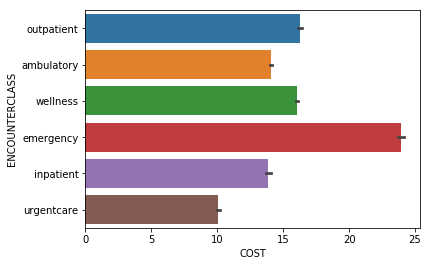

In [ ]:
#4 Answer
import seaborn as sns
dev = sns.barplot(y="ENCOUNTERCLASS", x="COST", data=encounters_ny)
pic =dev.get_figure()


# Create this graph. 

ENCOUNTERCLASS is on they axis and  and COST on X axis.

![Imgur](https://i.imgur.com/asCDZSM.png)


# High Cost Patients Classification 

A second Challenge is determinine the most expensive individuals.  This is set as all those groups that are more than 1 standard deviation above the mean, indicated as 'HIGHCOST' in the dataset.  

(5. 5 points) 
Overall, count the total number of individuals who are high cost in NY (i.e., where encounters_ny['HIGHCOST'] is equal to 1.) Assign to the value `total_high_cost_ny`. 

Overall, count the total number of individuals who are high cost in MA (i.e., where encounters_ny['HIGHCOST'] is equal to 1.) Assign to the value `total_high_cost_ma`. 




In [ ]:
#5 Answer 
total_high_cost_ny=encounters_ny['HIGHCOST'].sum()
total_high_cost_ma=encounters_ma['HIGHCOST'].sum()

print(total_high_cost_ny, total_high_cost_ma)

21558 22505


### Split the Train and test set for Classification with you DV set to HIGHCOST for NY Only. 


(6. 5 points) First split your data into an 70% train and 30% validation. Make sure that the results are *stratified* (equal classes in train and test) with `random_state = 111`.  

Also set the following:

```
splittest3 = y_train.iloc[5]
splittest4 = y_test.iloc[3]
```


In [ ]:
#6 Answer 
#Set y equal to train encounters_ny['HIGHCOST'] 
y = encounters_ny['HIGHCOST']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111,stratify=y)

#This will be used for testing. 
splittest3 = y_train.iloc[3]
splittest4 = y_test.iloc[17]
print (splittest3, splittest4)

1 1


### Classification with Random Forrest
(8. 5 points) Use a RandomForestClassifier to predict the 'HIGH_COST' with use the `CODE` and `ENCOUNTERCLASS` as independent variables.  

Also set the following:

```
train_accuracy
test_accuracy
```

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
#This fits the model object to the data.
classifier.fit(X_train,  y_train)
train_accuracy = classifier.score(X_train, y_train)
test_accuracy = classifier.score( X_test,  y_test)
#This creates the prediction. 
print("Classifier Accuracy for Train: ", train_accuracy )
print("Classifier Accuracy for Test: ", test_accuracy )

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Classifier Accuracy for Train:  0.8849033319621555
Classifier Accuracy for Test:  0.8817826977220373


### Submission
For the final submission, please submit a link to this notebook.



In [ ]:
#This just gets the data and preps the environment. 
tests="https://github.com/jkuruzovich/final-starter-2019/raw/master/tests.zip"
ok="https://github.com/jkuruzovich/final-starter-2019/blob/master/final.ok"
!wget $tests && unzip -o tests.zip && wget $ok

--2019-05-07 17:14:04--  https://github.com/jkuruzovich/final-starter-2019/raw/master/tests.zip
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jkuruzovich/final-starter-2019/master/tests.zip [following]
--2019-05-07 17:14:05--  https://raw.githubusercontent.com/jkuruzovich/final-starter-2019/master/tests.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4414 (4.3K) [application/zip]
Saving to: ‘tests.zip’

tests.zip           100%[===================>]   4.31K  --.-KB/s    in 0s      

2019-05-07 17:14:05 (84.1 MB/s) - ‘tests.zip’ saved [4414/4414]

Archive:  tests.zip
   creating: tests/
  in

In [ ]:
!pip uninstall okgrade -y && pip install git+https://github.com/data-8/Gofer-Grader  


  Cloning https://github.com/data-8/Gofer-Grader to /tmp/pip-req-build-azxgdpg4
  Running command git clone -q https://github.com/data-8/Gofer-Grader /tmp/pip-req-build-azxgdpg4
  Stored in directory: /tmp/pip-ephem-wheel-cache-fmi_bu5a/wheels/9e/62/24/8563ae039051d6ba979557d1766bfebbda5dd08f8572e3e35d
Successfully built gofer-grader


In [ ]:
%%capture  
#This capture command supresses output. 

#***********
#Add the manually graded ones
q4=5
comments=""
points_per_test=2.5

#***********


from client.api.notebook import Notebook
ok = Notebook('final.ok')
_ = ok.auth(inline=False)
from bs4 import BeautifulSoup
import pandas as pd
import os

#Grade Results
results= {q[:-3]:ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')}

#If running locally with lots of notebooks load the grades. 
df = pd.DataFrame()
row=df.shape[0]
df.loc[row,'student']=name  #This is set in the last.
df.loc[row,'rcsid']=rcsid   #This is set in the last. 
total_grade=0
#This loops through the results
for key, val in results.items(): 
    df.loc[row,key]=val.grade
    results_key=str(key)+"-failed"
    df.loc[row,key]=val.grade*points_per_test
    #We use beautiful soup to parse the tests. 
    soup = BeautifulSoup(str(val.failed_tests), "lxml")
    #There are multiple components, but the expected data seems most valuable. 
    got = soup.get_text().split('\\n')[16:20]
    df.loc[row,results_key]=str(got)
    total_grade+=df.loc[row,key]  #total grade
df.loc[row, 'q4']=q4
total_grade+=q4
df.loc[row,'total_grade']=total_grade
df.loc[row,'comments']=comments

if not os.path.isfile('grades.csv'):
   df.to_csv('grades.csv', index=False)
else: # else it exists so append without writing the header
   df.to_csv('grades.csv', mode='a', header=False,index=False)



In [ ]:
!cat grades

In [ ]:
cols=df.columns
row=df.shape[0]-1
for x in range(df.shape[1]):
  print(cols[x]," = ",  df.iloc[row,x])
  

student  =  enter your name
rcsid  =  rcsid
q05b  =  2.5
q05b-failed  =  []
q01a  =  2.5
q01a-failed  =  []
q07a  =  2.5
q07a-failed  =  []
q02b  =  2.5
q02b-failed  =  []
q03b  =  2.5
q03b-failed  =  []
q03a  =  2.5
q03a-failed  =  []
q06b  =  2.5
q06b-failed  =  []
q01b  =  2.5
q01b-failed  =  []
q07b  =  2.5
q07b-failed  =  []
q05a  =  2.5
q05a-failed  =  []
q06a  =  2.5
q06a-failed  =  []
q02a  =  2.5
q02a-failed  =  []
q4  =  5.0
total_grade  =  35.0
comments  =  


In [ ]:
#See All Records
df= pd.read_csv('grades.csv')
df

,student,rcsid,q05b,q05b-failed,q01a,q01a-failed,q07a,q07a-failed,q02b,q02b-failed,...,q07b-failed,q05a,q05a-failed,q06a,q06a-failed,q02a,q02a-failed,q4,total_grade,comments
0,enter your name,rcsid,2.5,[],2.5,[],2.5,[],2.5,[],...,[],2.5,[],2.5,[],2.5,[],5.0,35.0,NaN
1,enter your name,rcsid,2.5,[],2.5,[],2.5,[],2.5,[],...,[],2.5,[],2.5,[],2.5,[],5.0,35.0,NaN
